In [1]:
import sys 
import pandas as pd
#from train_models import train_pgbm_dengue, apply_dengue_pgbm_on_chik, train_pgbm_chik
from train_models import train_pgbm_model, apply_dengue_pgbm_on_chik
sys.path.append('../')
from pgbm_model import pgbm_pred
import joblib
import numpy as np
from preprocessing import get_ml_data

In [2]:
df = pd.read_csv('selected_cities.csv', index_col = 'Unnamed: 0')
df.head()

,geocode,state,sum_cases,POP22,inc,n_last_ep,year_first_ep,year_last_ep_before_2023,region,region_codes,start_train_chik,end_train_chik
0,2211001,PI,2325,868523,267.695847,4,2015,2022,ne,1,2014-10-01,2022-11-01
1,2913606,BA,1858,197163,942.367483,2,2015,2016,ne,1,2014-10-01,2016-11-01
2,2914802,BA,1846,185500,995.148248,2,2016,2022,ne,1,2015-10-01,2022-11-01
3,2111300,MA,1788,1061374,168.460882,2,2016,2022,ne,1,2015-10-01,2022-11-01
4,2925303,BA,1687,158736,1062.770890,2,2016,2017,ne,1,2015-10-01,2017-11-01


In [3]:

city = 2802106
df = df.loc[df.geocode == city]
state = df.state
INI_DATE = df.start_train_chik.values[0]
END_DATE_TRAIN = df.end_train_chik.values[0]
END_DATE = '2023-11-01'

In [4]:
print('INI_DATE:', INI_DATE)
print('END_DATE_TRAIN:', END_DATE_TRAIN)

INI_DATE: 2014-10-01
END_DATE_TRAIN: 2021-11-01


## Train dengue

%%time
train_pgbm_model(city, 'dengue', ini_date = INI_DATE, end_date_train = END_DATE_TRAIN , end_date = END_DATE)



Apply dengue on chik:

apply_dengue_pgbm_on_chik(city, ini_date= INI_DATE, end_date = END_DATE)

Train chik:

%%time
train_pgbm_model(city, 'chik', ini_date = INI_DATE, end_date_train = END_DATE_TRAIN , end_date = END_DATE)



/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(


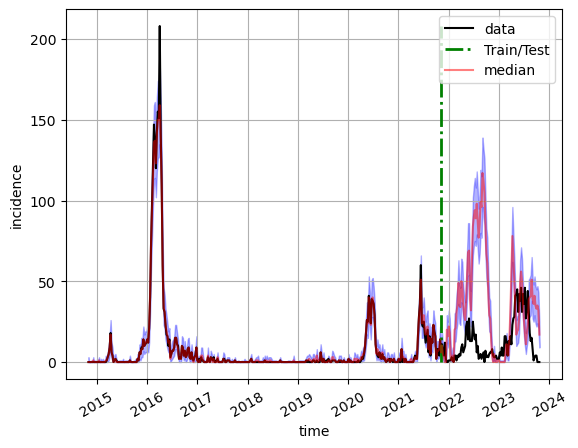

CPU times: user 6.46 s, sys: 3.17 s, total: 9.63 s
Wall time: 2.83 s


In [5]:
%%time
model = pgbm_pred(city, 4, 52, doenca = 'chik', ratio = 0.75, ini_date = INI_DATE, 
                  end_train_date = END_DATE_TRAIN, end_date = END_DATE,
                  filename =  f'../data/chik_{city}_cluster.csv')

In [6]:
model.distribution

'negativebinomial'